### **`Data Preprocessing`**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# read the dataset file
df = pd.read_csv('./ckd-dataset-v2.csv')

# check the top 5 rows of dataframe
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,...,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12


In [2]:
# as we can see row 0 and 1 contain garbadge values so we can delete these two rows
df.drop([0,1],axis=0,inplace=True)

# reset the index after droping row 1 and 2
df = df.reset_index(drop=True)

# again check the top 5 extries 
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
2,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
3,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
4,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [3]:
pd.set_option('display.max_columns', None)
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,< 112,< 48.1,138 - 143,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,12120 - 14500,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
2,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,< 112,48.1 - 86.2,133 - 138,< 3.65,< 7.31,8.7 - 10,29.6 - 33.5,4.46 - 5.05,14500 - 16880,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
3,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,13.9 - 15.2,41.3 - 45.2,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
4,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,154 - 196,< 48.1,133 - 138,< 3.65,< 7.31,13.9 - 15.2,37.4 - 41.3,5.05 - 5.64,7360 - 9740,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [4]:
dataForHeatmap = df.loc[:, ['bp (Diastolic)', 'bp limit', 'rbc', 'pc', 'pcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'affected']]
dataForHeatmap.dtypes

bp (Diastolic)    object
bp limit          object
rbc               object
pc                object
pcc               object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
affected          object
dtype: object

In [5]:
for column in dataForHeatmap:
    dataForHeatmap[column] = pd.to_numeric(dataForHeatmap[column])
dataForHeatmap.dtypes

bp (Diastolic)    int64
bp limit          int64
rbc               int64
pc                int64
pcc               int64
htn               int64
dm                int64
cad               int64
appet             int64
pe                int64
ane               int64
affected          int64
dtype: object

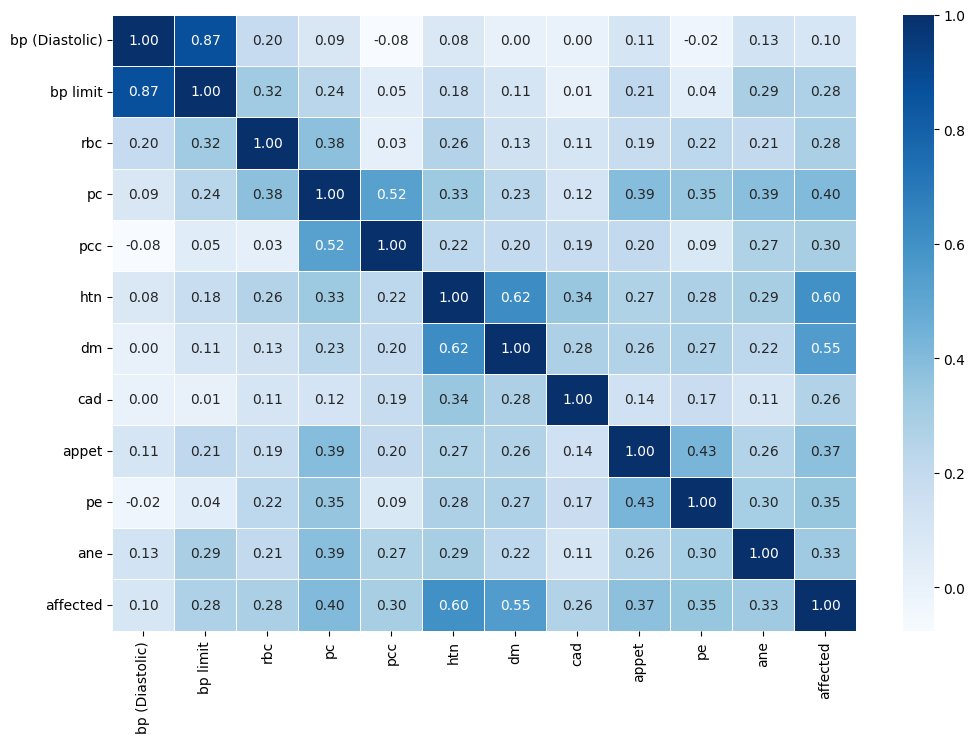

In [6]:
# dataForHeatmap.corr()

# Corellation
cor_metricx=dataForHeatmap.corr()
fig, axis=plt.subplots(figsize=(12,8))
axis=sns.heatmap(cor_metricx, annot=True, linewidths=0.5, fmt=".2f", cmap="Blues") # annot-->numbers inside boxs

In [7]:
# check if there is any null/NaN entry present in our dataframe
df.isnull().values.any()

False

As we can see we don't have any `row/column` having `Null/NaN` value in it

In [8]:
# seperate features and target variables 
X = df.drop(['class'], axis=1)
Y = df['class']

From now `X` and `Y` is our `Feature` and `Target` columns respectively

In [9]:
# check for unique classes in target column
Y.unique()

array(['ckd', 'notckd'], dtype=object)

In [10]:
# convert the categories of target ("ckd", "notckd") to (1, 0) 
Y = Y.map({'ckd': 1, 'notckd': 0})

<AxesSubplot: >

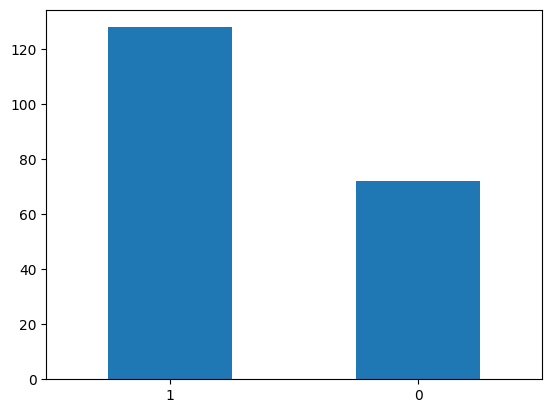

In [11]:
# Check for class imballance problem
Y.value_counts().plot.bar(rot=0)

we are having **`70-75` notckd** and almost **`125 ckd`** data points. <br />
So, we could say that we don't have serious `class-imballance` problem in dataset. <br />
Now our focus is on `Feature valiables`

In [12]:
X.head()

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.019 - 1.021,1 - 1,0,< 0,0,0,0,< 112,< 48.1,138 - 143,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,< 0,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,12120 - 14500,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
2,0,0,1.009 - 1.011,≥ 4,1,< 0,1,0,1,< 112,48.1 - 86.2,133 - 138,< 3.65,< 7.31,8.7 - 10,29.6 - 33.5,4.46 - 5.05,14500 - 16880,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
3,1,1,1.009 - 1.011,3 - 3,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,13.9 - 15.2,41.3 - 45.2,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
4,0,0,1.015 - 1.017,< 0,0,< 0,0,0,0,154 - 196,< 48.1,133 - 138,< 3.65,< 7.31,13.9 - 15.2,37.4 - 41.3,5.05 - 5.64,7360 - 9740,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [13]:
X['stage'].unique()

array(['s1', 's4', 's3', 's2', 's5'], dtype=object)

Convert the categories of **`stage`** column (s1, s2,...) in to number (1, 2,...)

In [14]:
X['stage'] = X['stage'].map({'s1': 1, 's2': 2, 's3': 3, 's4': 4, 's5': 5})

Removing '<','>' and '-' while keeping the suitable values

In [15]:
#Removed all unnecessary whitespaces 
#Found average of values given in range
#Addded 1 after removing '>', Subtracted 1 after removing '<' and kept the first value when values are given in range like "3-6" and the original value when there was '≥' 



regexp = re.compile(r'≥|≤')

X = X.applymap(lambda x: str(x).replace(' ','') if ' ' in str(x) else x)
X = X.applymap(lambda x: (float(str(x).split('-')[0])+float(str(x).split('-')[1]))/2 if '-' in str(x) else x) 
X = X.applymap(lambda x: float(x[1:])-1 if '<' in str(x) else (str(x).replace('≥','').replace('≤','') if regexp.search(str(x)) else(float(x[1:])+1 if '>' in str(x) else x )))


X.head()

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.02,1.0,0,-1.0,0,0,0,111.0,47.1,140.5,2.65,6.31,11.95,35.45,4.755,8550.0,0,0,0,0,0,0,227.944,1,1,11.0
1,0,0,1.01,-1.0,0,-1.0,0,0,0,133.0,47.1,135.5,2.65,6.31,11.95,35.45,4.755,13310.0,0,0,0,0,0,0,227.944,1,1,11.0
2,0,0,1.01,4,1,-1.0,1,0,1,111.0,67.15,135.5,2.65,6.31,9.35,31.55,4.755,15690.0,0,0,0,1,0,0,139.8635,1,1,11.0
3,1,1,1.01,3.0,0,-1.0,0,0,0,133.0,47.1,135.5,2.65,6.31,14.55,43.25,4.755,8550.0,0,0,0,0,0,0,139.8635,1,1,11.0
4,0,0,1.016,-1.0,0,-1.0,0,0,0,175.0,47.1,135.5,2.65,6.31,14.55,39.35,5.345,8550.0,0,1,0,1,1,0,139.8635,1,1,16.0


In [16]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df1 = df[col_list]
    return df1
dataSet = swap_columns(X, "affected","age")

In [17]:
dataSet.head()

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,age,affected
0,0,0,1.02,1.0,0,-1.0,0,0,0,111.0,47.1,140.5,2.65,6.31,11.95,35.45,4.755,8550.0,0,0,0,0,0,0,227.944,1,11.0,1
1,0,0,1.01,-1.0,0,-1.0,0,0,0,133.0,47.1,135.5,2.65,6.31,11.95,35.45,4.755,13310.0,0,0,0,0,0,0,227.944,1,11.0,1
2,0,0,1.01,4,1,-1.0,1,0,1,111.0,67.15,135.5,2.65,6.31,9.35,31.55,4.755,15690.0,0,0,0,1,0,0,139.8635,1,11.0,1
3,1,1,1.01,3.0,0,-1.0,0,0,0,133.0,47.1,135.5,2.65,6.31,14.55,43.25,4.755,8550.0,0,0,0,0,0,0,139.8635,1,11.0,1
4,0,0,1.016,-1.0,0,-1.0,0,0,0,175.0,47.1,135.5,2.65,6.31,14.55,39.35,5.345,8550.0,0,1,0,1,1,0,139.8635,1,16.0,1


In [18]:
# make grf float and update p value

# take the mean value for puting instead 'p'
n = dataSet.loc[dataSet['grf'] != 'p']
meanValue = n['grf'].astype(float).mean()
meanValue



69.96813366834172

In [19]:
# replace p with average of colomn 
for ind in dataSet.index:
    if dataSet['grf'][ind] == 'p':
        dataSet['grf'][ind] = dataSet['grf'][ind].replace('p',str(meanValue))

# change the type of coloumn
dataSet['grf'] = dataSet['grf'].astype(float)
dataSet['grf']

C:\Users\M. Bilal\AppData\Local\Temp\ipykernel_2464\198849226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['grf'][ind] = dataSet['grf'][ind].replace('p',str(meanValue))


0      227.94400
1      227.94400
2      139.86350
3      139.86350
4      139.86350
         ...    
195     39.20035
196     25.61750
197     64.36610
198    114.69800
199     25.61750
Name: grf, Length: 200, dtype: float64

In [20]:
dataSet.head()

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,age,affected
0,0,0,1.02,1.0,0,-1.0,0,0,0,111.0,47.1,140.5,2.65,6.31,11.95,35.45,4.755,8550.0,0,0,0,0,0,0,227.9440,1,11.0,1
1,0,0,1.01,-1.0,0,-1.0,0,0,0,133.0,47.1,135.5,2.65,6.31,11.95,35.45,4.755,13310.0,0,0,0,0,0,0,227.9440,1,11.0,1
2,0,0,1.01,4,1,-1.0,1,0,1,111.0,67.15,135.5,2.65,6.31,9.35,31.55,4.755,15690.0,0,0,0,1,0,0,139.8635,1,11.0,1
3,1,1,1.01,3.0,0,-1.0,0,0,0,133.0,47.1,135.5,2.65,6.31,14.55,43.25,4.755,8550.0,0,0,0,0,0,0,139.8635,1,11.0,1
4,0,0,1.016,-1.0,0,-1.0,0,0,0,175.0,47.1,135.5,2.65,6.31,14.55,39.35,5.345,8550.0,0,1,0,1,1,0,139.8635,1,16.0,1


In [21]:
# loading libraries
import numpy as np

In [22]:
dataSet.shape

(200, 28)

In [23]:
# Split dependent and independent variables...
x = dataSet.iloc[:, 0:-1]
y = dataSet.iloc[:, -1]

In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: affected, dtype: object

In [25]:
x.head()

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,age
0,0,0,1.02,1.0,0,-1.0,0,0,0,111.0,47.1,140.5,2.65,6.31,11.95,35.45,4.755,8550.0,0,0,0,0,0,0,227.9440,1,11.0
1,0,0,1.01,-1.0,0,-1.0,0,0,0,133.0,47.1,135.5,2.65,6.31,11.95,35.45,4.755,13310.0,0,0,0,0,0,0,227.9440,1,11.0
2,0,0,1.01,4,1,-1.0,1,0,1,111.0,67.15,135.5,2.65,6.31,9.35,31.55,4.755,15690.0,0,0,0,1,0,0,139.8635,1,11.0
3,1,1,1.01,3.0,0,-1.0,0,0,0,133.0,47.1,135.5,2.65,6.31,14.55,43.25,4.755,8550.0,0,0,0,0,0,0,139.8635,1,11.0
4,0,0,1.016,-1.0,0,-1.0,0,0,0,175.0,47.1,135.5,2.65,6.31,14.55,39.35,5.345,8550.0,0,1,0,1,1,0,139.8635,1,16.0


In [48]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=0.25, random_state=22222)

print("Shape of xTrain : ",xTrain.shape)
print("Shape of xTest : ",xTest.shape)
print("Shape of yTrain : ",yTrain.shape)
print("Shape of yTest : ",yTest.shape)

Shape of xTrain :  (150, 27)
Shape of xTest :  (50, 27)
Shape of yTrain :  (150,)
Shape of yTest :  (50,)


In [49]:
# Loading library for Decision tree model...
from sklearn.tree import DecisionTreeClassifier

In [50]:
model = DecisionTreeClassifier(criterion="entropy",random_state=22222)


In [51]:
# history = model.fit(xTrain,yTrain)
model.fit(xTrain,yTrain)

DecisionTreeClassifier(criterion='entropy', random_state=22222)

In [52]:
from sklearn.model_selection import learning_curve
# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

In [53]:
# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

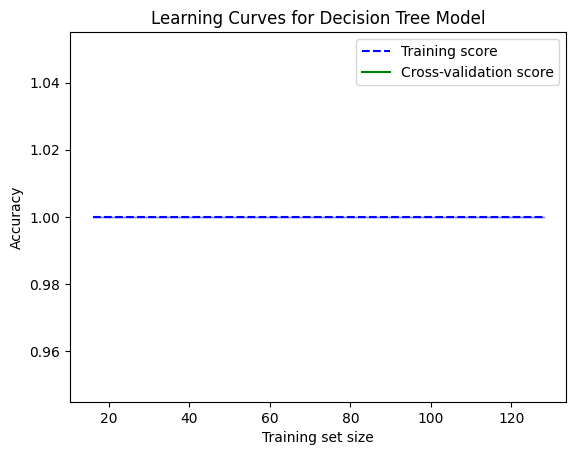

In [54]:
# Plot the learning curves
plt.plot(train_sizes, train_mean, '--', color='blue', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.5)
plt.plot(train_sizes, test_mean, '-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.5)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curves for Decision Tree Model')
plt.legend(loc='best')
plt.show()

In [55]:
accuracy = model.score(xTest,yTest)
accuracy

0.98

C:\Users\M. Bilal\AppData\Local\Temp\ipykernel_2464\1716256444.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1], [accuracy, accuracy], 'k-', color='blue')


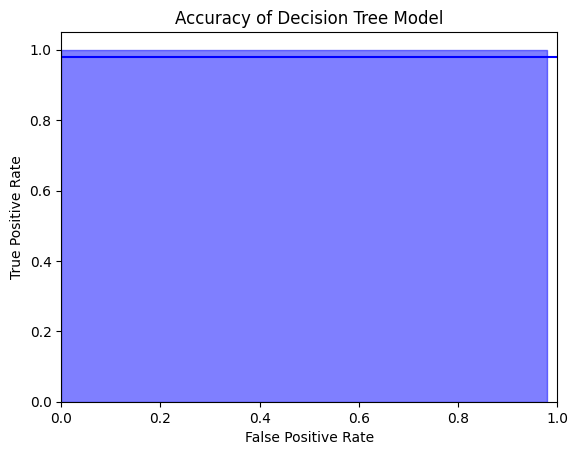

In [35]:
# # Plot the accuracy graph
# plt.plot([0,1], [accuracy, accuracy], 'k-', color='blue')
# plt.fill_betweenx([0,1], 0, accuracy, color='blue', alpha=0.5)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Accuracy of Decision Tree Model')
# plt.show()

In [31]:
# history.history['acc']
# model.evaluate(xTest,yTest)

In [32]:
# y_predict=model.predict(xTest)
# print(y_predict)

In [33]:
# print(model.predict_proba(xTest))